In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Ipynb_importer
from utils_x import *
from parameters_x import *
import seaborn as sns
import datetime
from scipy.stats import norm
sns.set(style="darkgrid")
import logging
import time



importing Jupyter notebook from utils_x.ipynb
importing Jupyter notebook from parameters_x.ipynb


In [2]:
print("----------------- load data--------------------")
data = pd.read_csv('index500_v3_adjustment_new.csv', index_col=0)
begin_interval_df = pd.read_csv('begin_931_interval_df.csv', index_col=0)
data["date_time"]  = pd.to_datetime(data["date_time"])
begin_interval_df["date_time"] = pd.to_datetime(begin_interval_df["date_time"])

----------------- load data--------------------


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data = pd.merge(data, begin_interval_df, how="left", on=['unique_symbol','date_time'])

In [4]:
print("----------------- limit_tag--------------------")
gb = data.groupby(['unique_symbol'])['adjustment_cumsum']
data['t+1_adjustment_cumsum'] = gb.transform(lambda x: x.shift(-1))
data["r1"]  = (data["t+1_close_mid"] - data["t+1_adjustment_cumsum"] + data["adjustment_cumsum"]) /data["close"] -1
data["limit_tag"] = data["r1"].apply(lambda x: 1 if x >= 0.099 else 0)

----------------- limit_tag--------------------


In [5]:
print("------------------- label --------------------")
gb = data.groupby(["unique_symbol"])
data["t+2_open"] = gb["close_mid"].transform(lambda x: x.shift(-2))
data["y_open"] = data["t+2_open"] - data['t+2_adjustment']
data['return'] = data.apply(lambda x: (x['y_open'])/x['t+1_close_mid']-1, axis=1)

data =  data[data["type"] == 0].copy()
data =  data[data["use_tag"] == 1].copy()
gb = data.groupby(['date_time'])['return']
data['label'] = gb.transform(lambda x: (x-x.mean())/x.std())
data['mr'] = gb.transform(lambda x: x.mean())

------------------- label --------------------


In [6]:
gb = data.groupby(["date_time"])
for t,ddf in gb:
    print(t, len(ddf))

2010-01-29 00:00:00 489
2010-02-01 00:00:00 488
2010-02-02 00:00:00 484
2010-02-03 00:00:00 483
2010-02-04 00:00:00 495
2010-02-05 00:00:00 489
2010-02-08 00:00:00 475
2010-02-09 00:00:00 472
2010-02-10 00:00:00 489
2010-02-11 00:00:00 467
2010-02-12 00:00:00 469
2010-02-22 00:00:00 494
2010-02-23 00:00:00 472
2010-02-24 00:00:00 487
2010-02-25 00:00:00 486
2010-02-26 00:00:00 486
2010-03-01 00:00:00 481
2010-03-02 00:00:00 481
2010-03-03 00:00:00 483
2010-03-04 00:00:00 484
2010-03-05 00:00:00 482
2010-03-08 00:00:00 489
2010-03-09 00:00:00 487
2010-03-10 00:00:00 489
2010-03-11 00:00:00 487
2010-03-12 00:00:00 476
2010-03-15 00:00:00 482
2010-03-16 00:00:00 477
2010-03-17 00:00:00 487
2010-03-18 00:00:00 487
2010-03-19 00:00:00 480
2010-03-22 00:00:00 488
2010-03-23 00:00:00 487
2010-03-24 00:00:00 487
2010-03-25 00:00:00 473
2010-03-26 00:00:00 477
2010-03-29 00:00:00 484
2010-03-30 00:00:00 475
2010-03-31 00:00:00 476
2010-04-01 00:00:00 488
2010-04-02 00:00:00 480
2010-04-06 00:00

2011-08-24 00:00:00 481
2011-08-25 00:00:00 473
2011-08-26 00:00:00 484
2011-08-29 00:00:00 489
2011-08-30 00:00:00 481
2011-08-31 00:00:00 471
2011-09-01 00:00:00 476
2011-09-02 00:00:00 457
2011-09-05 00:00:00 481
2011-09-06 00:00:00 472
2011-09-07 00:00:00 482
2011-09-08 00:00:00 472
2011-09-09 00:00:00 464
2011-09-13 00:00:00 481
2011-09-14 00:00:00 472
2011-09-15 00:00:00 466
2011-09-16 00:00:00 462
2011-09-19 00:00:00 475
2011-09-20 00:00:00 455
2011-09-21 00:00:00 446
2011-09-22 00:00:00 481
2011-09-23 00:00:00 488
2011-09-26 00:00:00 467
2011-09-27 00:00:00 474
2011-09-28 00:00:00 479
2011-09-29 00:00:00 475
2011-09-30 00:00:00 463
2011-10-10 00:00:00 479
2011-10-11 00:00:00 489
2011-10-12 00:00:00 466
2011-10-13 00:00:00 477
2011-10-14 00:00:00 464
2011-10-17 00:00:00 470
2011-10-18 00:00:00 469
2011-10-19 00:00:00 468
2011-10-20 00:00:00 477
2011-10-21 00:00:00 473
2011-10-24 00:00:00 474
2011-10-25 00:00:00 478
2011-10-26 00:00:00 481
2011-10-27 00:00:00 477
2011-10-28 00:00

2013-03-08 00:00:00 490
2013-03-11 00:00:00 492
2013-03-12 00:00:00 487
2013-03-13 00:00:00 486
2013-03-14 00:00:00 483
2013-03-15 00:00:00 485
2013-03-18 00:00:00 484
2013-03-19 00:00:00 483
2013-03-20 00:00:00 481
2013-03-21 00:00:00 490
2013-03-22 00:00:00 492
2013-03-25 00:00:00 490
2013-03-26 00:00:00 485
2013-03-27 00:00:00 483
2013-03-28 00:00:00 490
2013-03-29 00:00:00 483
2013-04-01 00:00:00 489
2013-04-02 00:00:00 486
2013-04-03 00:00:00 484
2013-04-08 00:00:00 493
2013-04-09 00:00:00 486
2013-04-10 00:00:00 480
2013-04-11 00:00:00 484
2013-04-12 00:00:00 479
2013-04-15 00:00:00 488
2013-04-16 00:00:00 492
2013-04-17 00:00:00 478
2013-04-18 00:00:00 487
2013-04-19 00:00:00 479
2013-04-22 00:00:00 491
2013-04-23 00:00:00 491
2013-04-24 00:00:00 482
2013-04-25 00:00:00 490
2013-04-26 00:00:00 489
2013-05-02 00:00:00 489
2013-05-03 00:00:00 480
2013-05-06 00:00:00 488
2013-05-07 00:00:00 479
2013-05-08 00:00:00 486
2013-05-09 00:00:00 487
2013-05-10 00:00:00 487
2013-05-13 00:00

2014-09-24 00:00:00 474
2014-09-25 00:00:00 476
2014-09-26 00:00:00 472
2014-09-29 00:00:00 471
2014-09-30 00:00:00 477
2014-10-08 00:00:00 475
2014-10-09 00:00:00 477
2014-10-10 00:00:00 477
2014-10-13 00:00:00 474
2014-10-14 00:00:00 472
2014-10-15 00:00:00 473
2014-10-16 00:00:00 473
2014-10-17 00:00:00 473
2014-10-20 00:00:00 473
2014-10-21 00:00:00 470
2014-10-22 00:00:00 469
2014-10-23 00:00:00 466
2014-10-24 00:00:00 467
2014-10-27 00:00:00 465
2014-10-28 00:00:00 464
2014-10-29 00:00:00 467
2014-10-30 00:00:00 464
2014-10-31 00:00:00 464
2014-11-03 00:00:00 464
2014-11-04 00:00:00 459
2014-11-05 00:00:00 458
2014-11-06 00:00:00 463
2014-11-07 00:00:00 463
2014-11-10 00:00:00 460
2014-11-11 00:00:00 462
2014-11-12 00:00:00 463
2014-11-13 00:00:00 463
2014-11-14 00:00:00 460
2014-11-17 00:00:00 461
2014-11-18 00:00:00 459
2014-11-19 00:00:00 453
2014-11-20 00:00:00 453
2014-11-21 00:00:00 454
2014-11-24 00:00:00 454
2014-11-25 00:00:00 457
2014-11-26 00:00:00 462
2014-11-27 00:00

2016-03-31 00:00:00 462
2016-04-01 00:00:00 464
2016-04-05 00:00:00 461
2016-04-06 00:00:00 460
2016-04-07 00:00:00 461
2016-04-08 00:00:00 464
2016-04-11 00:00:00 463
2016-04-12 00:00:00 464
2016-04-13 00:00:00 462
2016-04-14 00:00:00 464
2016-04-15 00:00:00 464
2016-04-18 00:00:00 463
2016-04-19 00:00:00 461
2016-04-20 00:00:00 458
2016-04-21 00:00:00 458
2016-04-22 00:00:00 458
2016-04-25 00:00:00 459
2016-04-26 00:00:00 459
2016-04-27 00:00:00 460
2016-04-28 00:00:00 463
2016-04-29 00:00:00 463
2016-05-03 00:00:00 465
2016-05-04 00:00:00 467
2016-05-05 00:00:00 468
2016-05-06 00:00:00 468
2016-05-09 00:00:00 466
2016-05-10 00:00:00 466
2016-05-11 00:00:00 467
2016-05-12 00:00:00 465
2016-05-13 00:00:00 464
2016-05-16 00:00:00 466
2016-05-17 00:00:00 467
2016-05-18 00:00:00 468
2016-05-19 00:00:00 466
2016-05-20 00:00:00 467
2016-05-23 00:00:00 464
2016-05-24 00:00:00 465
2016-05-25 00:00:00 466
2016-05-26 00:00:00 465
2016-05-27 00:00:00 465
2016-05-30 00:00:00 464
2016-05-31 00:00

2017-09-29 00:00:00 476
2017-10-09 00:00:00 474
2017-10-10 00:00:00 476
2017-10-11 00:00:00 477
2017-10-12 00:00:00 479
2017-10-13 00:00:00 480
2017-10-16 00:00:00 480
2017-10-17 00:00:00 480
2017-10-18 00:00:00 480
2017-10-19 00:00:00 478
2017-10-20 00:00:00 478
2017-10-23 00:00:00 479
2017-10-24 00:00:00 479
2017-10-25 00:00:00 479
2017-10-26 00:00:00 477
2017-10-27 00:00:00 477
2017-10-30 00:00:00 475
2017-10-31 00:00:00 478
2017-11-01 00:00:00 479
2017-11-02 00:00:00 480
2017-11-03 00:00:00 479
2017-11-06 00:00:00 478
2017-11-07 00:00:00 479
2017-11-08 00:00:00 479
2017-11-09 00:00:00 479
2017-11-10 00:00:00 480
2017-11-13 00:00:00 479
2017-11-14 00:00:00 478
2017-11-15 00:00:00 475
2017-11-16 00:00:00 477
2017-11-17 00:00:00 476
2017-11-20 00:00:00 476
2017-11-21 00:00:00 473
2017-11-22 00:00:00 471
2017-11-23 00:00:00 470
2017-11-24 00:00:00 468
2017-11-27 00:00:00 467
2017-11-28 00:00:00 467
2017-11-29 00:00:00 470
2017-11-30 00:00:00 466
2017-12-01 00:00:00 468
2017-12-04 00:00

In [7]:
params = {
    'task': 'train',
    'booster': 'dart',
#     'boosting_type': 'gbdt',
#     'eta': 0.15,
    'max_depth': 6,
#     'lambda': 5,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'gamma': 5,
#     'rate_drop': 0.1,
#     'skip_drop': 0.5,
    'nthread': 10,
    'alpha': 100
         }
num_rounds =1000
early = 30

In [8]:
# 训练日志
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler("log/log" + str(time.ctime()) + ".txt")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
console = logging.StreamHandler()
console.setLevel(logging.INFO)
logger.addHandler(handler)
logger.addHandler(console)

In [9]:
print("---------------- add factor--------------------")

data["r"] = data["close"]/ data["open"] - 1
data["amplitude"] = (data["high"] - data["low"]) / data["close"]
data["amplitude_ratio"] =  abs((data["close"] - data["open"])/(data["high"] - data["low"]))
data["amplitude_ratio"] =  data["amplitude_ratio"].fillna(0)


---------------- add factor--------------------


In [10]:
print("----------------- stationary --------------------")

gb = data.groupby(['date_time'])['r']
data["r_distribute"] = gb.transform(lambda x: (x-x.mean())/x.std())

gb = data.groupby(['date_time'])['r1']
data["r1_distribute"] = gb.transform(lambda x: (x-x.mean())/x.std())

gb = data.groupby(['date_time'])['open']
data['open'] = gb.transform(lambda x: (x-x.mean())/x.std())

# data["close_rank"] = data.groupby(['date_time'])['close'].transform( lambda x:x.rank())
# data["close_cont"] = data.groupby(['date_time'])['close'].transform(lambda x:x.count())
# data["close_cont"] = data["close_cont"] + 1
# data["close"] = data["close_rank"] / data["close_cont"]
# data["close"] = data["close"].apply(lambda x: InverseNormalCDF(x))

gb = data.groupby(['date_time'])['close']
data['close'] = gb.transform(lambda x: (x-x.mean())/x.std())
data['close_std'] = data.apply(lambda x : time_series_desribe(x, 5, "close"),axis=1)


data["turnover_rank"] = data.groupby(['date_time'])['turnover'].transform( lambda x:x.rank())
data["turnover_cont"] = data.groupby(['date_time'])['turnover'].transform(lambda x:x.count())
data["turnover_cont"] = data["turnover_cont"] + 1
data["turnover"] = data["turnover_rank"] / data["turnover_cont"]
data["turnover"] = data["turnover"].apply(lambda x: InverseNormalCDF(x))


data["volume_rank"] = data.groupby(['date_time'])['volume'].transform( lambda x:x.rank())
data["volume_cont"] = data.groupby(['date_time'])['volume'].transform(lambda x:x.count())
data["volume_cont"] = data["volume_cont"] + 1
data["volume"] = data["volume_rank"] / data["volume_cont"]
data["volume"] = data["volume"].apply(lambda x: InverseNormalCDF(x))


p_col = ['close', 'open', 'high', 'low', 'wap']
v_col = ['turnover', 'volume']
n_shift = 15
vol_factor = []
for factor_name in v_col:
    for i in range(1,n_shift):
        form = ""
#         form = "uniform"
#         logger.info("-----------------------------uniform_v_col-----------------------------------------------")
#         data[form + factor_name + str(i)] = rank2norm(data, "date_time", factor_name + str(i))
        print(form + factor_name + str(i))
        vol_factor.append(form + factor_name + str(i))
return_factor = []
for factor_name in p_col:
    for i in range(1,n_shift):
        return_factor.append(factor_name + str(i))


----------------- stationary --------------------
turnover1
turnover2
turnover3
turnover4
turnover5
turnover6
turnover7
turnover8
turnover9
turnover10
turnover11
turnover12
turnover13
turnover14
volume1
volume2
volume3
volume4
volume5
volume6
volume7
volume8
volume9
volume10
volume11
volume12
volume13
volume14


In [11]:
# intraday_factor = ["r", 'close', 'open', 'turnover', "volume", "amplitude", "r1"]
intraday_factor = ["r","r_distribute", 'close', 'open', 'turnover', "volume", "amplitude_ratio", "r1", "r1_distribute"]
# intraday_factor = ["r", 'close', 'open', 'turnover', "volume", "amplitude_ratio"]
# intraday_factor = ["r", 'close', 'open', 'turnover', "volume", "amplitude", "amplitude_ratio", "r1"]
use_f = set()
use_f = set(return_factor) | set(intraday_factor) | set(vol_factor)
use_f = list(use_f)
logger.info("return_factor")
logger.info(set(return_factor))
logger.info("intraday_factor")
logger.info(set(intraday_factor))
logger.info("vol_factor")
logger.info(set(vol_factor))
logger.info("len(use_f):")
logger.info(len(use_f))

return_factor
{'wap2', 'wap11', 'wap9', 'close12', 'low14', 'high5', 'high11', 'low10', 'close4', 'high13', 'low13', 'wap5', 'wap13', 'open4', 'low5', 'wap12', 'wap14', 'high4', 'close9', 'low2', 'low9', 'wap6', 'low7', 'open5', 'close1', 'open7', 'low3', 'wap4', 'open10', 'open3', 'close13', 'high8', 'close10', 'high6', 'high12', 'close5', 'wap3', 'wap10', 'open13', 'high3', 'open2', 'low11', 'high9', 'close14', 'close6', 'close8', 'open12', 'open1', 'high1', 'high2', 'close11', 'high7', 'close3', 'open9', 'wap1', 'open11', 'open8', 'low4', 'close7', 'high14', 'high10', 'low6', 'wap7', 'low12', 'low8', 'wap8', 'close2', 'low1', 'open6', 'open14'}
intraday_factor
{'close', 'volume', 'amplitude_ratio', 'open', 'turnover', 'r_distribute', 'r1', 'r', 'r1_distribute'}
vol_factor
{'turnover3', 'turnover9', 'volume4', 'turnover12', 'turnover2', 'volume10', 'turnover6', 'volume12', 'volume6', 'volume7', 'volume14', 'volume9', 'volume5', 'turnover13', 'volume13', 'turnover4', 'volume8', 'turno

In [49]:
np.corrcoef(data["r1"], data["label"])[0,1]

-0.025460400445455725

In [50]:
np.corrcoef(data["r1_distribute"], data["label"])[0,1]

-0.03810956305277045

In [52]:
np.corrcoef(data["r"], data["label"])[0,1]

-0.0016780253821355613

In [51]:
np.corrcoef(data["r_distribute"], data["label"])[0,1]

-5.4410257021361905e-05

In [53]:
np.corrcoef(data["r_distribute"], data["r"])[0,1]

0.7292171073760167

In [54]:
np.corrcoef(data["r1_distribute"], data["r1"])[0,1]

0.7186637216289975

In [12]:
print(data["label"].mean())
data = data[~data['return'].isnull()].copy()
print(data["label"].mean())   

1.4670713461129768e-18
1.5638230230437114e-18


In [13]:
    
print("-------------------- train -----------------------")
for i in range(1):
    
    t1 = datetime.datetime(2010,1,1)
    t2 = datetime.datetime(2013,1,1)
    t3 = datetime.datetime(2015,1,1)
    t4 = datetime.datetime(2017,1,1)
    data_tr = data[ (data["date_time"] >= t1)&(data["date_time"] < t2)]
    data_te = data[ (data["date_time"] >= t2)&(data["date_time"] < t3)]
    data_fin = data[ (data["date_time"] >= t3)&(data["date_time"] < t4)]
    print(len(data_tr["date_time"]))
    print(len(data_te["date_time"]))
    print(len(data_fin["date_time"]))
    
    X_train = data_tr[use_f]
    y_train = data_tr['label']
    X_test = data_te[use_f]
    y_test = data_te['label']

    market_return = list(data[data["date_time"].isin(list(data_fin.date_time))].groupby(['date_time'])['return'].mean())
    logger.info(params)
    bst = train_op(X_train, y_train, params, num_rounds, X_test, y_test, early)  
    importance_dic = f_importance(bst, use_f)
    preds = bst.predict(xgb.DMatrix(data_fin[use_f]), ntree_limit=bst.best_ntree_limit)
    data_fin["preds"] = list(preds)
    preds = bst.predict(xgb.DMatrix(data_te[use_f]), ntree_limit=bst.best_ntree_limit)
    data_te["preds"] = list(preds)
    

-------------------- train -----------------------
336745
229673
220154


{'task': 'train', 'booster': 'dart', 'max_depth': 6, 'nthread': 10, 'alpha': 100}
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-rmse:1.05532	eval-rmse:1.05697
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 30 rounds.
[1]	train-rmse:1.02293	eval-rmse:1.02609
[2]	train-rmse:1.00631	eval-rmse:1.01068
[3]	train-rmse:0.997431	eval-rmse:1.00302
[4]	train-rmse:0.992647	eval-rmse:0.999013
[5]	train-rmse:0.989778	eval-rmse:0.997059
[6]	train-rmse:0.987531	eval-rmse:0.995671
[7]	train-rmse:0.986316	eval-rmse:0.995217
[8]	train-rmse:0.985451	eval-rmse:0.994759
[9]	train-rmse:0.984568	eval-rmse:0.994435
[10]	train-rmse:0.983754	eval-rmse:0.994318
[11]	train-rmse:0.983113	eval-rmse:0.994128
[12]	train-rmse:0.98252	eval-rmse:0.994061
[13]	train-rmse:0.981995	eval-rmse:0.994148
[14]	train-rmse:0.981627	eval-rmse:0.994073
[15]	train-rmse:0.981261	eval-rmse:0.994013
[16]	train-rmse:0.980893	eval-rmse:0.994009
[17]	train-rmse:0.980336	eval-rmse:0.994002
[18]	train-rmse:0.979894	eval-rmse:0.993961
[19]	train-rmse:0.97937	eval-rmse:0.993

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
print(data_fin["limit_tag"].sum())

542


In [15]:
data_fin[data_fin["limit_tag"] == 1]

,unique_symbol,date_time,close,turnover,open,high,low,volume,use_tag,adjustment,...,amplitude,amplitude_ratio,r_distribute,r1_distribute,close_std,turnover_rank,turnover_cont,volume_rank,volume_cont,preds
2616722,2317,2015-01-06,0.420159,-0.276647,0.412702,20.15,19.12,-0.654452,1,0.0,...,0.052046,0.533981,0.427976,9.492517,0.005608,183.0,468.0,120.0,468.0,0.295209
2618934,2174,2015-01-07,3.330352,-2.024503,3.391632,50.00,48.84,-2.855875,1,0.0,...,0.023496,0.543103,-0.798322,11.728816,0.021760,10.0,466.0,1.0,466.0,0.385374
2622519,732,2015-01-09,0.074205,-0.315097,0.096999,16.64,15.78,-0.472515,1,0.0,...,0.054156,0.267442,-0.548589,7.767437,0.027164,175.0,465.0,148.0,465.0,0.150376
2623062,603555,2015-01-09,0.328705,-0.332138,0.293366,19.10,17.93,-0.603409,1,0.0,...,0.063691,0.316239,1.436315,7.770118,0.031509,172.0,465.0,127.0,465.0,-0.059556
2623821,2408,2015-01-09,0.233651,-0.018868,0.235183,17.96,17.44,-0.380970,1,0.0,...,0.029817,0.000000,0.264969,7.741944,0.015542,229.0,465.0,163.5,465.0,0.207372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793542,601168,2016-12-16,-0.645640,0.713761,-0.640659,7.92,7.81,0.991997,1,0.0,...,0.014049,0.090909,-0.591406,7.867687,0.004272,356.0,467.0,392.0,467.0,0.174776
3793993,6,2016-12-16,-0.527492,0.679552,-0.529311,9.42,9.13,0.860122,1,0.0,...,0.031488,0.275862,0.113217,7.889323,0.011928,351.0,467.0,376.0,467.0,0.469309
3794215,939,2016-12-16,-0.254381,1.486886,-0.316110,12.40,11.56,1.395912,1,0.0,...,0.067742,0.952381,4.339281,7.897879,0.014100,435.0,467.0,429.0,467.0,0.306376
3795021,2681,2016-12-16,-0.209005,0.029526,-0.230657,12.99,12.51,-0.131885,1,0.0,...,0.037123,0.708333,1.393832,7.879596,0.009478,239.0,467.0,209.0,467.0,0.343871


In [16]:
gb = data_fin.groupby(['date_time'])['preds']
rank_level = 10
data_fin["pred_rank"] = gb.transform(lambda x: pd.qcut(x.rank(method='first'), rank_level, labels=False, duplicates="drop"))
portfolio_df = data_fin[data_fin["pred_rank"] == rank_level-1]
portfolio_limit_df = portfolio_df[portfolio_df["limit_tag"] ==0] 
portfolio_return = portfolio_df.groupby(["date_time"])["return"].mean()
marker_return = portfolio_df.groupby(["date_time"])["return"].mean()
data_fin["market_return"] = data_fin.groupby(["date_time"])["return"].transform("mean")
portfolio_limit_return = portfolio_limit_df.groupby(["date_time"])["return"].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
portfolio_df[portfolio_df["limit_tag"] == 1]["return"].mean()

0.03270858820345634

In [18]:
portfolio_df[portfolio_df["limit_tag"] == 1].count()

unique_symbol    280
date_time        280
close            280
turnover         280
open             280
                ... 
turnover_cont    280
volume_rank      280
volume_cont      280
preds            280
pred_rank        280
Length: 151, dtype: int64

In [19]:
len(portfolio_df)

22183

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


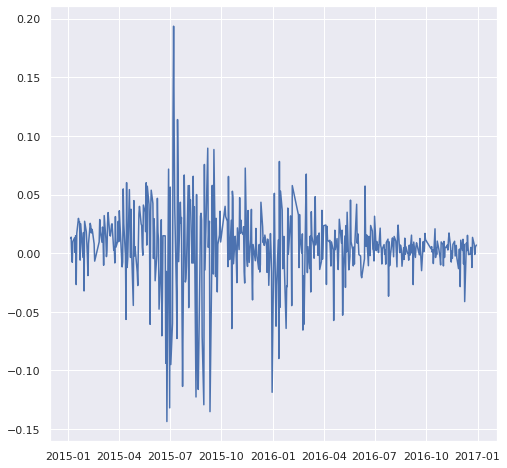

In [20]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(portfolio_return)

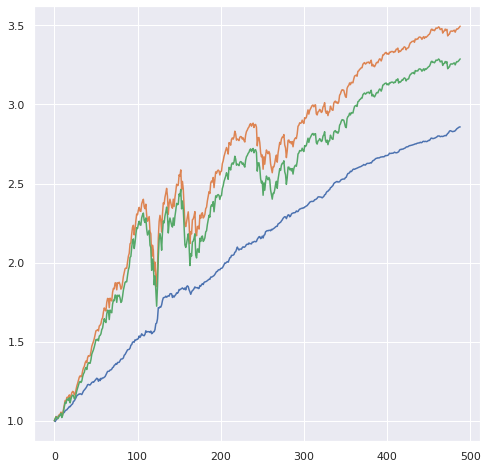

In [21]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(add_return(np.array(portfolio_return)-np.array(market_return)))
plt.plot(add_return(np.array(portfolio_return)))
# plt.plot(add_return(np.array(portfolio_limit_return)-np.array(market_return)))
plt.plot(add_return(np.array(portfolio_limit_return)))

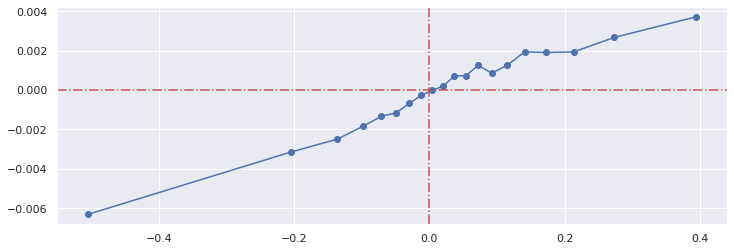

,bin_cut,x,y
0,"(-1.5739999999999998, -0.263]",-0.505154,-0.006315
1,"(-0.263, -0.162]",-0.203971,-0.003138
2,"(-0.162, -0.115]",-0.136142,-0.002491
3,"(-0.115, -0.0833]",-0.098100,-0.001837
4,"(-0.0833, -0.0593]",-0.070843,-0.001331
5,"(-0.0593, -0.0389]",-0.048866,-0.001154
6,"(-0.0389, -0.0207]",-0.029734,-0.000675
7,"(-0.0207, -0.00376]",-0.012146,-0.000274
8,"(-0.00376, 0.0125]",0.004409,-0.000012
9,"(0.0125, 0.0287]",0.020670,0.000208


In [22]:
plot_conditional_expectation( np.array(data_fin["preds"]),np.array(data_fin["return"])-np.array(data_fin["mr"]))

In [23]:
# sns.jointplot(
#               x = data_fin["preds"], y = data_fin["return"], 
#               data = data_fin,  #设置数据                                 
#               kind="reg",                                     
#               size = 8, #图表大小(自动调整为正方形))             
#               ratio = 5, #散点图与布局图高度比，整型             
#               marginal_kws = dict(bins=15, rug =True),              
#              )

In [24]:
for i in range(10):
    temp_df = data_fin[data_fin["pred_rank"] == i ]
    print(i, np.corrcoef(temp_df["return"] - temp_df["market_return"], temp_df["preds"])[0,1])

0 0.07828482694905495
1 0.029132676489900484
2 0.01347172334070261
3 0.01439979144728455
4 0.018528926773014983
5 -0.0014979425192590305
6 -0.011796977377583734
7 0.003992660635896972
8 0.0064359309864439026
9 0.0463283262251337


In [25]:
for i in range(10):
    temp_df = data_fin[data_fin["pred_rank"] == i ]
    print(i, np.corrcoef(temp_df["return"], temp_df["preds"])[0,1])

0 0.06366405152384229
1 0.03639484029946389
2 0.03161883619160462
3 0.036757879288963465
4 0.036873275703797594
5 0.027003423138339155
6 0.020148131824944925
7 0.030806657432347003
8 0.03466960131282071
9 0.05106626248583864


In [26]:
logger.info("row_corrcoef(test)")
logger.info(np.corrcoef(data_fin["return"] , data_fin["preds"])[0,1])

row_corrcoef(test)
0.06814287722745212


In [27]:
logger.info("dmarketmean_corrcoef(test)")
logger.info(np.corrcoef(data_fin["return"] - data_fin["mr"] , data_fin["preds"])[0,1])

dmarketmean_corrcoef(test)
0.08843012296496333


In [28]:
logger.info("row_corrcoef(val)")
logger.info(np.corrcoef(data_te["return"] , data_te["preds"])[0,1])

row_corrcoef(val)
0.10094305016267845


In [29]:
logger.info("dmarketmean_corrcoef(val)")
logger.info(np.corrcoef(data_te["return"] - data_te["mr"] , data_te["preds"])[0,1])

dmarketmean_corrcoef(val)
0.11204896040562907


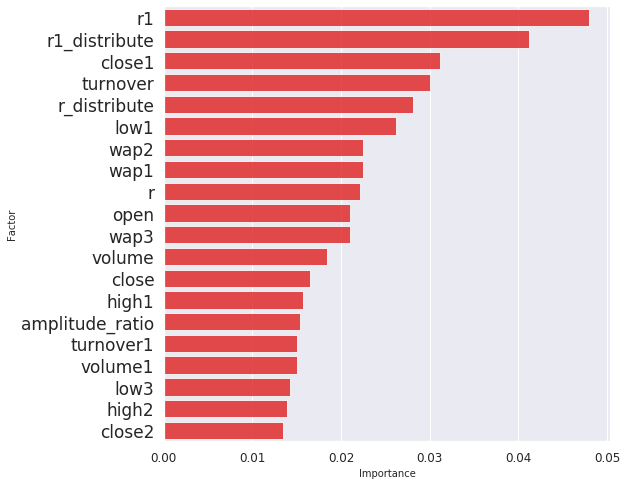

In [30]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.tick_params(labelsize=12)
f_importance_bar(importance_dic)

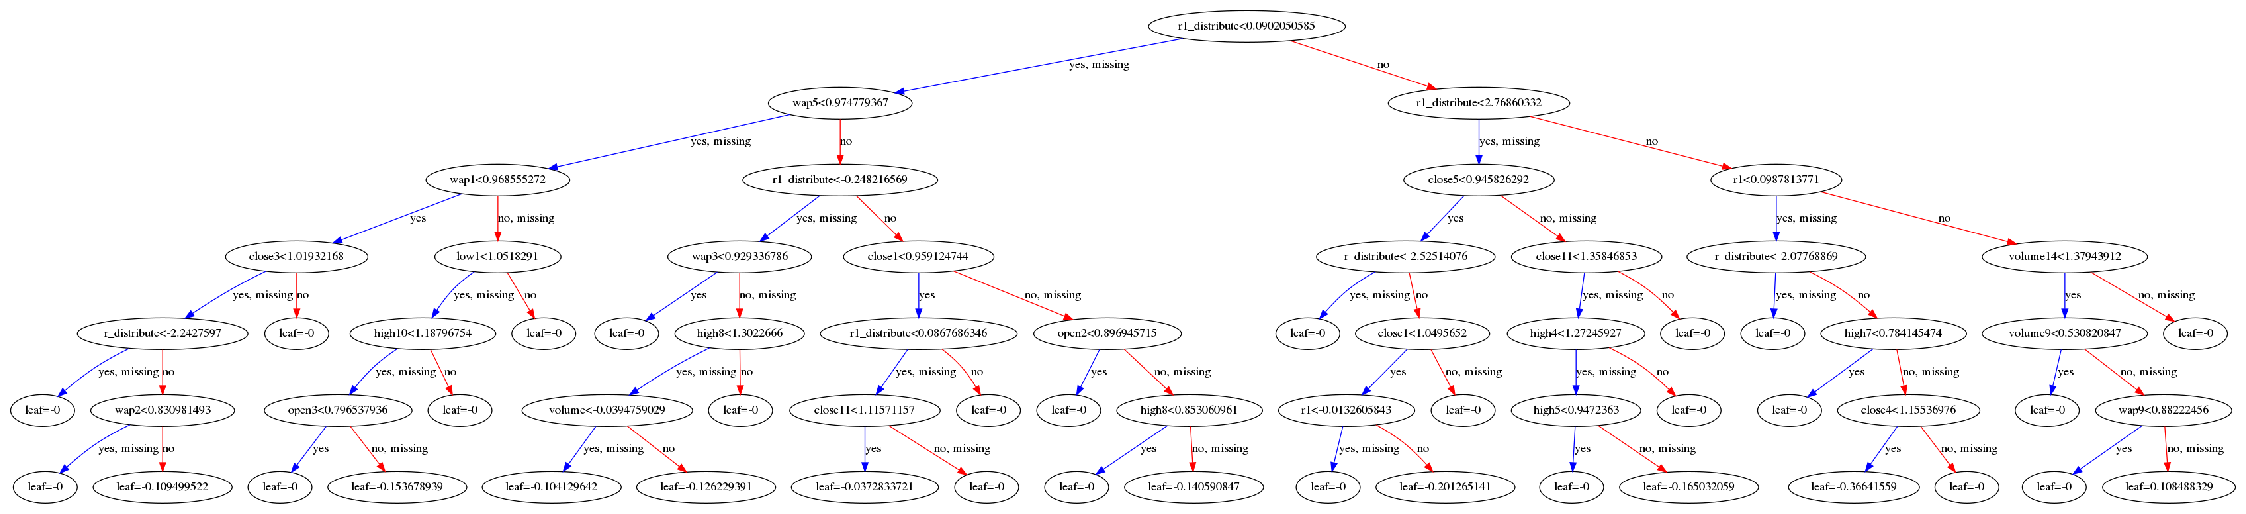

In [31]:
plt.rcParams['figure.figsize'] = (40.0, 38.0)
xgb.plot_tree(bst, num_trees=0)
plt.show()

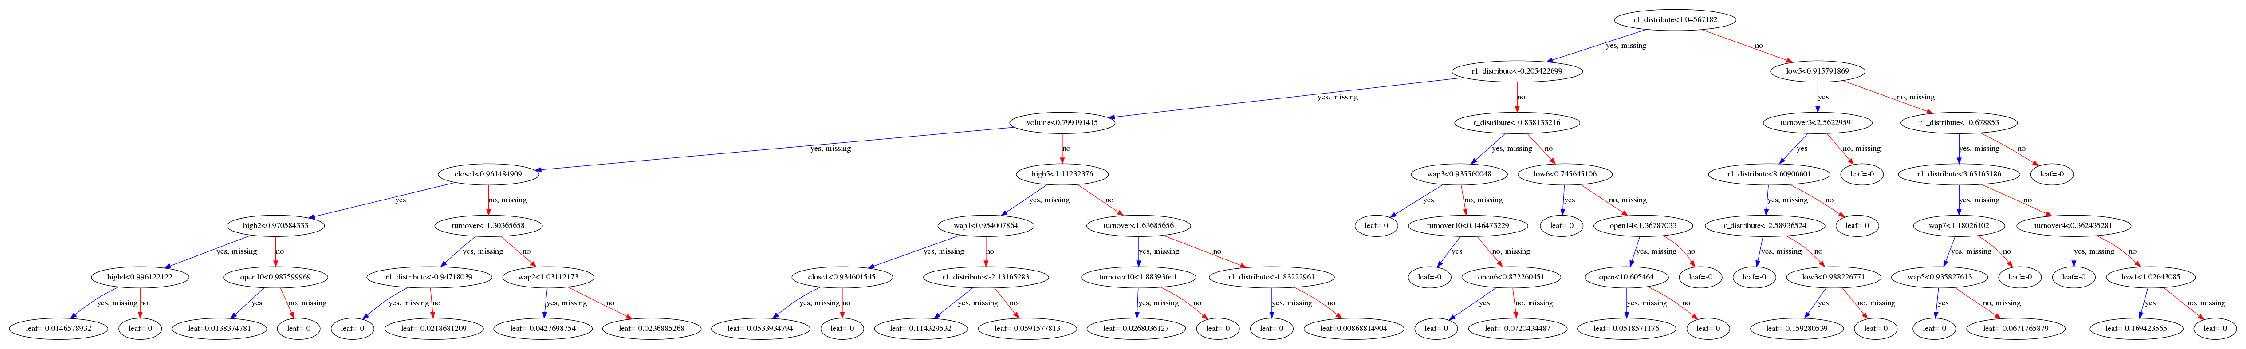

In [32]:
plt.rcParams['figure.figsize'] = (40.0, 38.0)
xgb.plot_tree(bst, num_trees=3)
plt.show()

In [33]:
df_tree = bst.trees_to_dataframe()

In [34]:
logger.info(df_tree)

      Tree  Node     ID        Feature     Split  Yes    No Missing  \
0        0     0    0-0  r1_distribute  0.090205  0-1   0-2     0-1   
1        0     1    0-1           wap5  0.974779  0-3   0-4     0-3   
2        0     2    0-2  r1_distribute  2.768603  0-5   0-6     0-5   
3        0     3    0-3           wap1  0.968555  0-7   0-8     0-8   
4        0     4    0-4  r1_distribute -0.248217  0-9  0-10     0-9   
...    ...   ...    ...            ...       ...  ...   ...     ...   
5392    60    54  60-54           Leaf       NaN  NaN   NaN     NaN   
5393    60    55  60-55           Leaf       NaN  NaN   NaN     NaN   
5394    60    56  60-56           Leaf       NaN  NaN   NaN     NaN   
5395    60    57  60-57           Leaf       NaN  NaN   NaN     NaN   
5396    60    58  60-58           Leaf       NaN  NaN   NaN     NaN   

             Gain     Cover  
0     1417.335940  336745.0  
1      112.007812  193465.0  
2     1042.652340  143280.0  
3      102.394531   63921.0

In [35]:
df_tree[df_tree["Tree"] == 8]

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
588,8,0,8-0,volume14,0.129008,8-1,8-2,8-2,36.262024,336745.0
589,8,1,8-1,low1,0.883897,8-3,8-4,8-4,16.358421,3286.0
590,8,2,8-2,turnover3,2.830991,8-5,8-6,8-5,27.001862,333459.0
591,8,3,8-3,Leaf,NaN,NaN,NaN,NaN,-0.000000,311.0
592,8,4,8-4,wap12,0.992451,8-7,8-8,8-8,16.305595,2975.0
...,...,...,...,...,...,...,...,...,...,...
646,8,58,8-58,Leaf,NaN,NaN,NaN,NaN,-0.000000,36.0
647,8,59,8-59,Leaf,NaN,NaN,NaN,NaN,-0.000000,482.0
648,8,60,8-60,Leaf,NaN,NaN,NaN,NaN,-0.040979,6941.0
649,8,61,8-61,Leaf,NaN,NaN,NaN,NaN,-0.000000,347.0


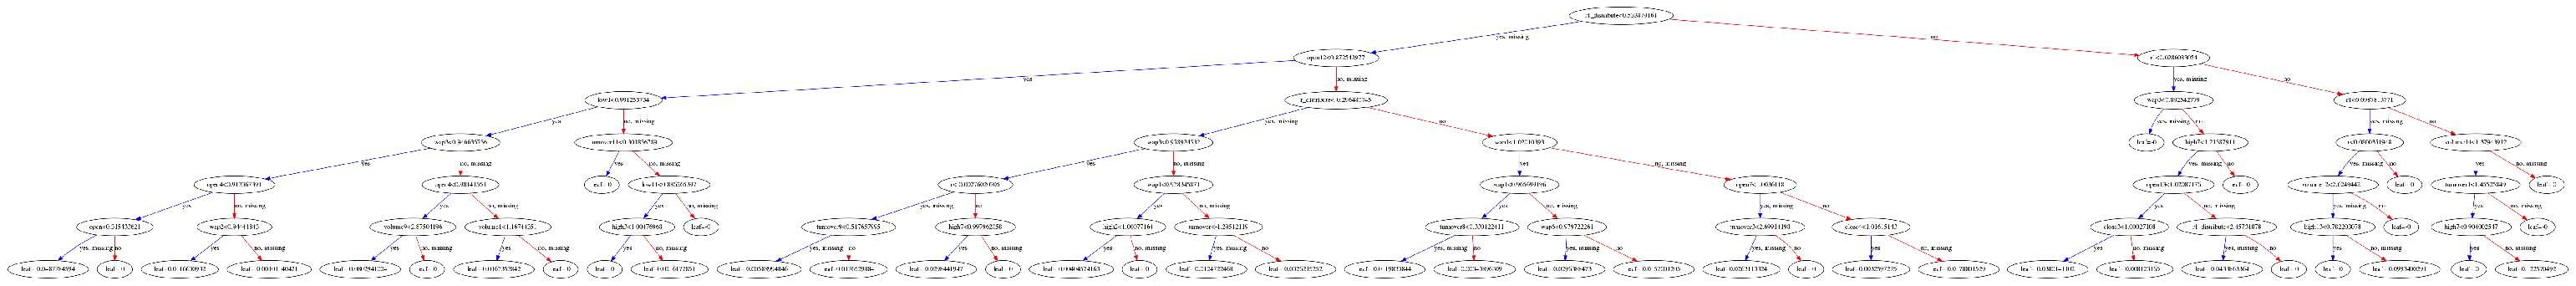

In [36]:
plt.rcParams['figure.figsize'] = (55.0, 55.0)
xgb.plot_tree(bst, num_trees=5)
plt.show()

In [37]:
all_tree_rounds = bst.best_ntree_limit + early
tr_step = []
te_step = []
fin_step = []
for i in range(1, all_tree_rounds):
    if i % 5==0:
        print("Tree numbers：" ,i ,"best_ntree_limit:", bst.best_ntree_limit, "early_stop:", early)
    temp1 = bst.predict( xgb.DMatrix(data_tr[use_f]),ntree_limit= i)
    temp2 = bst.predict( xgb.DMatrix(data_te[use_f]),ntree_limit= i)
    temp3 = bst.predict( xgb.DMatrix(data_fin[use_f]),ntree_limit= i)
    corrcoef1 = np.corrcoef(temp1, data_tr["return"] - data_tr["mr"])[0,1]
    corrcoef2 = np.corrcoef(temp2, data_te["return"] - data_te["mr"])[0,1]
    corrcoef3 = np.corrcoef(temp3, data_fin["return"] - data_fin["mr"])[0,1]
    tr_rmse = ((temp1 - data_tr["label"])*(temp1 - data_tr["label"])).mean()
    te_rmse = ((temp2 - data_te["label"])*(temp2 - data_te["label"])).mean()
    fin_rmse = ((temp3 - data_fin["label"])*(temp3 - data_fin["label"])).mean()
    tr_step.append([tr_rmse, corrcoef1])
    te_step.append([te_rmse, corrcoef2])
    fin_step.append([fin_rmse, corrcoef3])

Tree numbers： 5 best_ntree_limit: 31 early_stop: 30
Tree numbers： 10 best_ntree_limit: 31 early_stop: 30
Tree numbers： 15 best_ntree_limit: 31 early_stop: 30
Tree numbers： 20 best_ntree_limit: 31 early_stop: 30
Tree numbers： 25 best_ntree_limit: 31 early_stop: 30
Tree numbers： 30 best_ntree_limit: 31 early_stop: 30
Tree numbers： 35 best_ntree_limit: 31 early_stop: 30
Tree numbers： 40 best_ntree_limit: 31 early_stop: 30
Tree numbers： 45 best_ntree_limit: 31 early_stop: 30
Tree numbers： 50 best_ntree_limit: 31 early_stop: 30
Tree numbers： 55 best_ntree_limit: 31 early_stop: 30
Tree numbers： 60 best_ntree_limit: 31 early_stop: 30


In [38]:
logger.info(tr_step)
logger.info(te_rmse)
logger.info(fin_rmse)

[[1.1136899067007198, 0.11529235066216809], [1.0463854673412119, 0.1286457855179004], [1.0126647453340503, 0.1360418932395261], [0.994868047906077, 0.14194184519158343], [0.9853489780595684, 0.14793606962695133], [0.9796607493977239, 0.15369599796001715], [0.9752176119780582, 0.1626747758164154], [0.9728198970005353, 0.16669709482898215], [0.9711127301332791, 0.17043184161665362], [0.9693735601065002, 0.17540260101374786], [0.9677718310650641, 0.17925776248536618], [0.9665106921173645, 0.18310570462241946], [0.9653457741098227, 0.18653670375627582], [0.9643138855008249, 0.18955866796020743], [0.9635911625449161, 0.191638741522659], [0.9628732905729349, 0.19371500097526395], [0.9621506073267809, 0.19567460672851453], [0.9610581932498952, 0.19899972679757588], [0.9601919581672517, 0.20117620381993304], [0.9591656025668421, 0.20398465359347606], [0.9582031511717299, 0.20671109312987002], [0.9572177407778536, 0.20920302867884463], [0.9561901888906348, 0.2120569487654709], [0.95550795816091

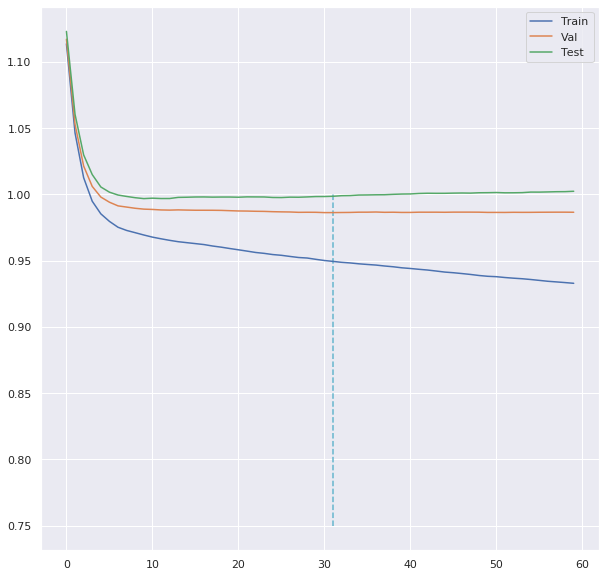

In [39]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(np.array(tr_step)[:,0], label="Train")
plt.plot(np.array(te_step)[:,0], label="Val")
plt.plot(np.array(fin_step)[:,0], label="Test")
plt.vlines(bst.best_ntree_limit, 0.75, 1, colors = "c", linestyles = "dashed")
plt.legend()

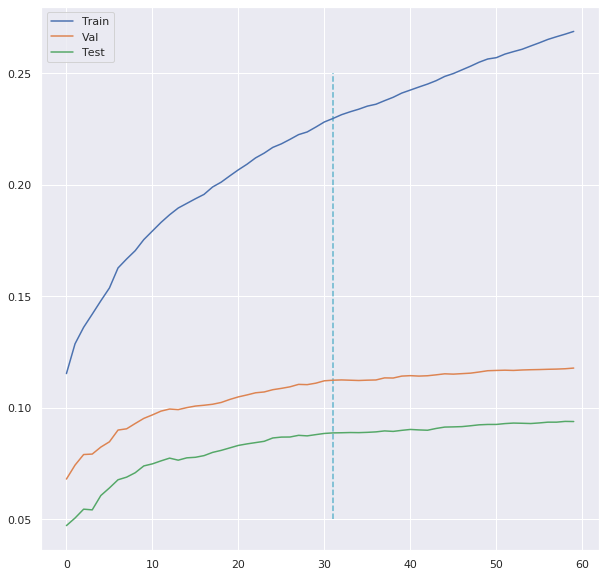

In [40]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(np.array(tr_step)[:,1], label="Train")
plt.plot(np.array(te_step)[:,1], label="Val")
plt.plot(np.array(fin_step)[:,1], label="Test")
plt.vlines(bst.best_ntree_limit, 0.05, 0.25, colors = "c", linestyles = "dashed")
plt.legend()

In [41]:
df_tree[(df_tree["Tree"] == 0)  & (df_tree["Feature"] == "Leaf")]

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
16,0,16,0-16,Leaf,NaN,NaN,NaN,NaN,-0.000000,47.0
18,0,18,0-18,Leaf,NaN,NaN,NaN,NaN,-0.000000,143.0
19,0,19,0-19,Leaf,NaN,NaN,NaN,NaN,-0.000000,448.0
23,0,23,0-23,Leaf,NaN,NaN,NaN,NaN,-0.000000,51.0
26,0,26,0-26,Leaf,NaN,NaN,NaN,NaN,-0.000000,131.0
27,0,27,0-27,Leaf,NaN,NaN,NaN,NaN,-0.000000,48.0
30,0,30,0-30,Leaf,NaN,NaN,NaN,NaN,-0.000000,66.0
31,0,31,0-31,Leaf,NaN,NaN,NaN,NaN,-0.000000,104.0
34,0,34,0-34,Leaf,NaN,NaN,NaN,NaN,-0.000000,115.0
36,0,36,0-36,Leaf,NaN,NaN,NaN,NaN,-0.000000,272.0


In [42]:
all_tree_rounds = bst.best_ntree_limit
zero = []
leave_node = []
tree_node = []
for tree_id in range(1, all_tree_rounds):
    zero.append(df_tree[(df_tree["Tree"] == tree_id)  & (df_tree["Feature"] == "Leaf") & (df_tree["Gain"] == 0)].shape[0])
    leave_node.append(df_tree[(df_tree["Tree"] == tree_id)  & (df_tree["Feature"] == "Leaf")].shape[0])
    tree_node.append(df_tree[(df_tree["Tree"] == tree_id)].shape[0])

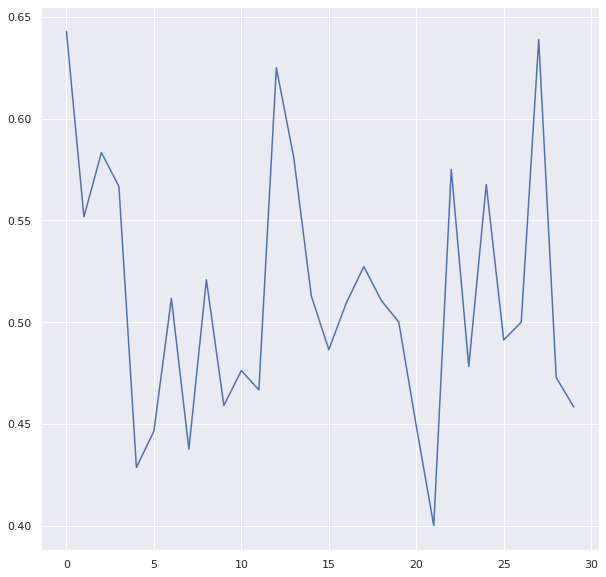

In [43]:
zero = np.array(zero)
leave_node = np.array(leave_node)
tree_node = np.array(tree_node)

plt.plot(zero/leave_node)

In [44]:
np.mean(zero/leave_node)

0.5124899599833006

In [45]:
np.mean(leave_node)

43.96666666666667

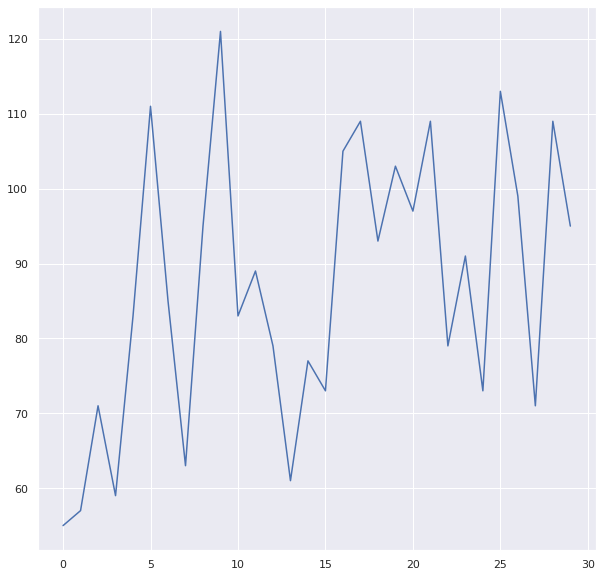

In [46]:
plt.plot(tree_node)